### Project Title: 
Compare the effectiveness of using embedding vectors versus sequence similarity for distinguishing kinase and phosphatase proteins family.


In [1]:
# Import Libraries
import pickle
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

## Load the pickle files containing the embedding vectors


In [2]:
# Step_1
# Load pickle file for Phosphate embedding vectors
with open('phosphatases_esm_embed_IPR000387_181.pickle', 'rb') as phosphataes_ems:
    phosphate_embedding = pickle.load(phosphataes_ems)

# extracting only embedding vectors from our data 
phosphatase_embedding_vectors= phosphate_embedding['embeddings']

# to convert list into array
phosphatase_embedding_vectors = np.array(phosphatase_embedding_vectors)
print(phosphatase_embedding_vectors)

[[ 0.0452728  -0.08247638  0.06674194 ... -0.2078567   0.0262513
  -0.00993582]
 [ 0.03816237 -0.05215209  0.01471812 ... -0.16060688  0.00342328
  -0.059587  ]
 [-0.00817687 -0.11001799 -0.03178105 ... -0.19230005  0.03790239
   0.02326383]
 ...
 [ 0.00520567 -0.11802296  0.03856032 ... -0.05013409 -0.00462413
   0.06832179]
 [ 0.0091853  -0.07265406  0.03666876 ... -0.11324372  0.00545511
  -0.01086515]
 [ 0.00763135 -0.04155854  0.02161545 ... -0.1685013   0.01104441
  -0.02235688]]


In [3]:
#Step_2
# Load pickle file Kinase embedding vectors
with open('esm_embed_IPR000719_804.pickle', 'rb' ) as kinases_esm:
    kinase_embedding = pickle.load(kinases_esm)

# Extracting only embedding vector from Kinase data 
kinase_embedding_vectors  = kinase_embedding['embeddings']

# to convert list into array
kinase_embedding_vectors = np.array(kinase_embedding_vectors)
print(kinase_embedding_vectors)


[[-0.09491246 -0.05908488 -0.01107617 ... -0.05061885  0.00588442
   0.00740225]
 [-0.01502496  0.03009647 -0.02034066 ... -0.20150089  0.05214024
   0.11167221]
 [-0.00381377 -0.00325825  0.01499879 ... -0.15519749  0.02831777
   0.10269105]
 ...
 [-0.00083086  0.02690944 -0.01155593 ... -0.08339126  0.03669926
   0.04787454]
 [-0.06087033 -0.12314641 -0.00525808 ... -0.0890021   0.04880723
   0.03923886]
 [ 0.0029127  -0.02724164  0.00569405 ... -0.1810964   0.06516649
   0.14548019]]


In [4]:
# Add levels
#kinase_labels= np.ones(len(kinase_embedding_vectors))

#phosphatase_labels = np.zeros(len(phosphatase_embedding_vectors))

In [5]:
#pip install seaborn

## Cosine similarity
Compute all-vs-all embedding vector similarities using cosine similarity.

cosine similarity are useful to find how similar tha data objects irrespective of their size, mostly vectors and it focues on the angle betwen two vectors. 

The smaller the angle, higher the cosine similarity.

For this I use embedding vector of Kinase and Phsophatese protein family. 


In [6]:
#################################
# Compute all-vs-all embedding vector similarities
#For Kinase
#kinase_cosine_similarity = cosine_similarity(kinase_embedding_vectors)
# For phosphatase
#phosphatase_cosine_similarity = cosine_similarity(phosphatase_embedding_vectors)
#mixed_distances_similarity = cosine_similarity(kinase_embedding_vectors, phosphatase_embedding_vectors)
#kinase_distances = 1 - kinase_cosine_similarity
#phosphatase_distances = 1 - phosphatase_cosine_similarity
#1 - mixed_distances_similarity
#################################

In [7]:
# Get lengths of kinase embedding vector 
n_kin = len(kinase_embedding_vectors)

# Concatenate embedding vectors
all_embedding_vectors = np.concatenate([kinase_embedding_vectors, phosphatase_embedding_vectors])

# Calculate cosine similarity
cos_similarity = cosine_similarity(all_embedding_vectors, all_embedding_vectors)


In [8]:
print(cos_similarity[:5])

[[1.         0.89895826 0.91835493 ... 0.9116062  0.91531554 0.91386693]
 [0.89895826 1.         0.96479556 ... 0.87936926 0.92706257 0.92622191]
 [0.91835493 0.96479556 1.         ... 0.93685472 0.96567022 0.96129196]
 [0.90759732 0.93552591 0.95524978 ... 0.90651568 0.94176188 0.94405202]
 [0.92469905 0.91943    0.95047042 ... 0.92781077 0.94573609 0.94759988]]


### Visualization

In [9]:
## Libraries 
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


###  t-SNE 
t-SNE is powerful technique for diamensionality reduction and data visualization. 

It is non-linear diamensionality reduction method in which algorithm allows us to seperate data that cannot be seperated by a stright line.
t-SNE allows us to preserve relationship of pairwise similarities between vectors in a lower diamentional space. 

Here I visualized the data in one dimensional to understand the underlying pattern. 


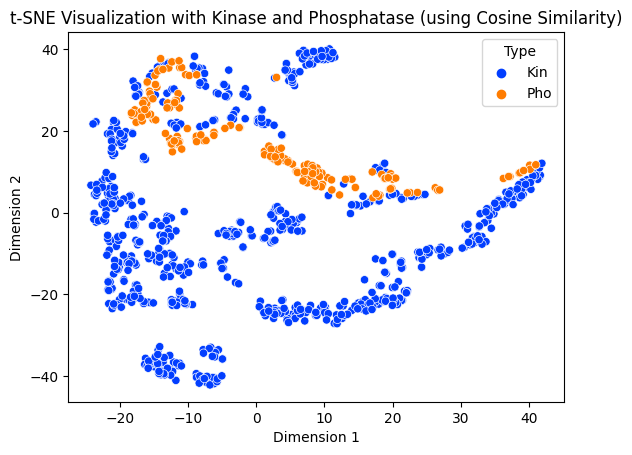

In [10]:
# Visualize using t-SNE

# Calculate t-SNE on the cosine similarity matrix
model = TSNE(n_components=2, random_state=4)
embedded = model.fit_transform(cos_similarity)

# Creating DataFrame with t-SNE results
df = pd.DataFrame(embedded, columns=['Dim_1', 'Dim_2'])

# Add a column for type of each embedding vector (Kinase or Phosphatase)
comparison_type = ['Kin'] * len(kinase_embedding_vectors) + ['Pho'] * len(phosphatase_embedding_vectors)
df['Type'] = comparison_type

# Plotting the t-SNE results with labels
sns.scatterplot(data=df, x='Dim_1', y='Dim_2', hue='Type', palette='bright')
plt.title('t-SNE Visualization with Kinase and Phosphatase (using Cosine Similarity)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [125]:
## Kullback-Leibler(KL) Divergence between embedding vectors
tsne = TSNE(n_components=2, random_state=4, )
embedded = tsne.fit_transform(all_embedding_vectors)
tsne.kl_divergence_

0.4420398473739624

In [126]:
df.head()

,Dim_1,Dim_2,Type
0,5.549798,34.011608,Kin
1,8.640373,-25.347765,Kin
2,-14.443533,-5.877108,Kin
3,-16.822990,12.785705,Kin
4,-23.779015,22.072094,Kin


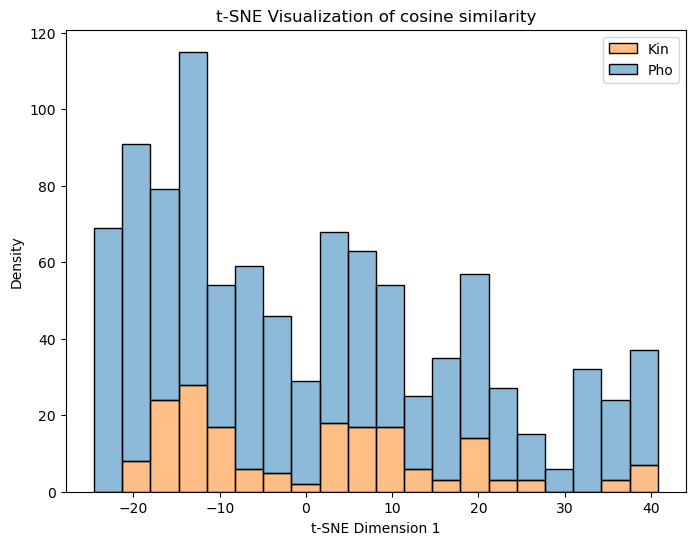

In [113]:
# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Dim_1', hue='Type', multiple='stack', kde=False, bins=20, alpha=0.5)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('Density')
plt.title('t-SNE Visualization of cosine similarity')
plt.legend(labels=['Kin', 'Pho'])
plt.show()

### KNN model


We are performing KNN supervised Ml algorithm to classify kinase and Phosphatase family.

Target Variable is ``y = df['Type']``
Independent variable is ``X = df[['PosX', 'PosY']]``


In [114]:
# Libraries
# from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,\
    confusion_matrix

In [115]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(df.drop('Type', axis=1))
scaled_features = scaler.transform(df.drop('Type',
                                           axis=1))
 
df_feat = pd.DataFrame(scaled_features,
                       columns=df.columns[:-1])
df_feat.head()

,Dim_1,Dim_2
0,0.285273,1.595413
1,0.458059,-1.211986
2,-0.832505,-0.291122
3,-0.965535,0.591535
4,-1.354429,1.030734


In [116]:
## spliting test and trainning data sets 
 
X_train, X_test,\
    y_train, y_test = train_test_split(scaled_features,
                                       df['Type'],
                                       test_size=0.30)


In [117]:
# KNN model and evaluation
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
 
# Predictions and Evaluations
# evaluate our KNN model !
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[243   8]
 [  3  42]]
              precision    recall  f1-score   support

         Kin       0.99      0.97      0.98       251
         Pho       0.84      0.93      0.88        45

    accuracy                           0.96       296
   macro avg       0.91      0.95      0.93       296
weighted avg       0.97      0.96      0.96       296



In [118]:
## Accurary of our model 
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.9628378378378378


From KNN Model: 
Confusion Matrix:

True Positive (TP): 243 kinase samples were correctly classified as kinases.
False Positive (FP): 8 phosphate samples were incorrectly classified as kinases.
False Negative (FN): 3 kinase samples were incorrectly classified as phosphates.
True Negative (TN): 42 phosphate samples were correctly classified as phosphates.

F1-Score:
F1-Score for kinases: Harmonic mean of precision and recall for kinases ≈ 0.98
F1-Score for phosphates: Harmonic mean of precision and recall for phosphates ≈ 0.88
